## 14.2 Ridge Regression

### Practice Activity

Make a pipeline that uses all the variables in the Ames dataset, and then fits Ridge Regression with λ=1.

Cross-validate this pipeline and compare the results to the ordinary linear regression.

Then fit the model on the whole dataset and get the coefficients. Make a plot of these coefficients compared to the ones from ordinary linear regression.



In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [6]:

from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

ames = pd.read_csv(io.BytesIO(uploaded['AmesHousing (4).csv']))
ames.head()

Saving AmesHousing.csv to AmesHousing (4).csv


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
# Clean data
# Get ride of columns with mostly NaN values

good_cols = df.isna().sum() < 100
ames = ames.loc[:,good_cols]

ames = ames.dropna()

X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]
X.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,62,0,0,0,0,0,5,2010,WD,Normal
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,120,0,0,6,2010,WD,Normal
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,6,2010,WD,Normal
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,0,4,2010,WD,Normal
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,3,2010,WD,Normal


## OLS/Linear Regression

In [14]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

In [15]:
scores = cross_val_score(lr_pipeline_1, X, y, cv=5, scoring='r2')
scores

array([-2.59303720e+21, -1.13145211e+19, -7.57138616e+20, -4.47669752e+18,
       -2.55949915e+20])

In [16]:
lr_pipeline_1.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e3172843670>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e31aab5edd0>)])),
                ('linear_regression', LinearRegression())])

In [17]:
lr_pipeline_1_fitted = lr_pipeline_1.fit(X, y)

In [45]:
coeff_1 = lr_pipeline_1_fitted.named_steps['linear_regression'].coef_


In [19]:
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')


array([-2.59303720e+21, -1.13145211e+19, -7.57138616e+20, -4.47669752e+18,
       -2.55949915e+20])

In [46]:
feature_names = lr_pipeline_1.named_steps['preprocessing'].get_feature_names_out()
coeff_1 = lr_pipeline_1.named_steps['linear_regression'].coef_
coefficients_df1 = pd.DataFrame({
    'Feature': feature_names,
    'Linear Coefficient': coeff_1
})

coefficients_df1.sort_values(by= 'Linear Coefficient', ascending=False).reset_index(drop=True).head()

,Feature,Linear Coefficient
0,dummify__Land Slope_Mod,1.154566e+17
1,dummify__Land Slope_Gtl,1.154566e+17
2,dummify__Land Slope_Sev,1.154566e+17
3,dummify__Paved Drive_N,1.129832e+17
4,dummify__Paved Drive_Y,1.129832e+17


## Ridge Regression

In [36]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha=1.0))]
)

In [37]:
cross_val_score(lr_pipeline_2, X, y, cv = 5, scoring = 'r2')


array([0.89815807, 0.91744024, 0.79493606, 0.78522563, 0.91389818])

In [38]:
scores = cross_val_score(lr_pipeline_2, X, y, cv = 5, scoring = 'r2')
scores

array([0.89815807, 0.91744024, 0.79493606, 0.78522563, 0.91389818])

In [39]:
lr_pipeline_2.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e3172bfb5e0>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e3172bfabc0>)])),
                ('ridge_regression', Ridge())])

In [40]:
lr_pipeline_2_fitted = lr_pipeline_2.fit(X, y)

In [47]:
feature_names = lr_pipeline_2.named_steps['preprocessing'].get_feature_names_out()
coeff_2 = lr_pipeline_2.named_steps['ridge_regression'].coef_
coefficients_df1 = pd.DataFrame({
    'Feature': feature_names,
    'Ridge Coefficient': coeff_2
})

coefficients_df1.sort_values(by='Ridge Coefficient', ascending=False).reset_index(drop=True).head()

,Feature,Ridge Coefficient
0,dummify__Roof Matl_WdShngl,83910.181360
1,dummify__Neighborhood_GrnHill,66530.685838
2,dummify__Condition 2_PosA,47180.798246
3,dummify__Neighborhood_StoneBr,36999.674033
4,dummify__Roof Matl_Membran,32582.552859


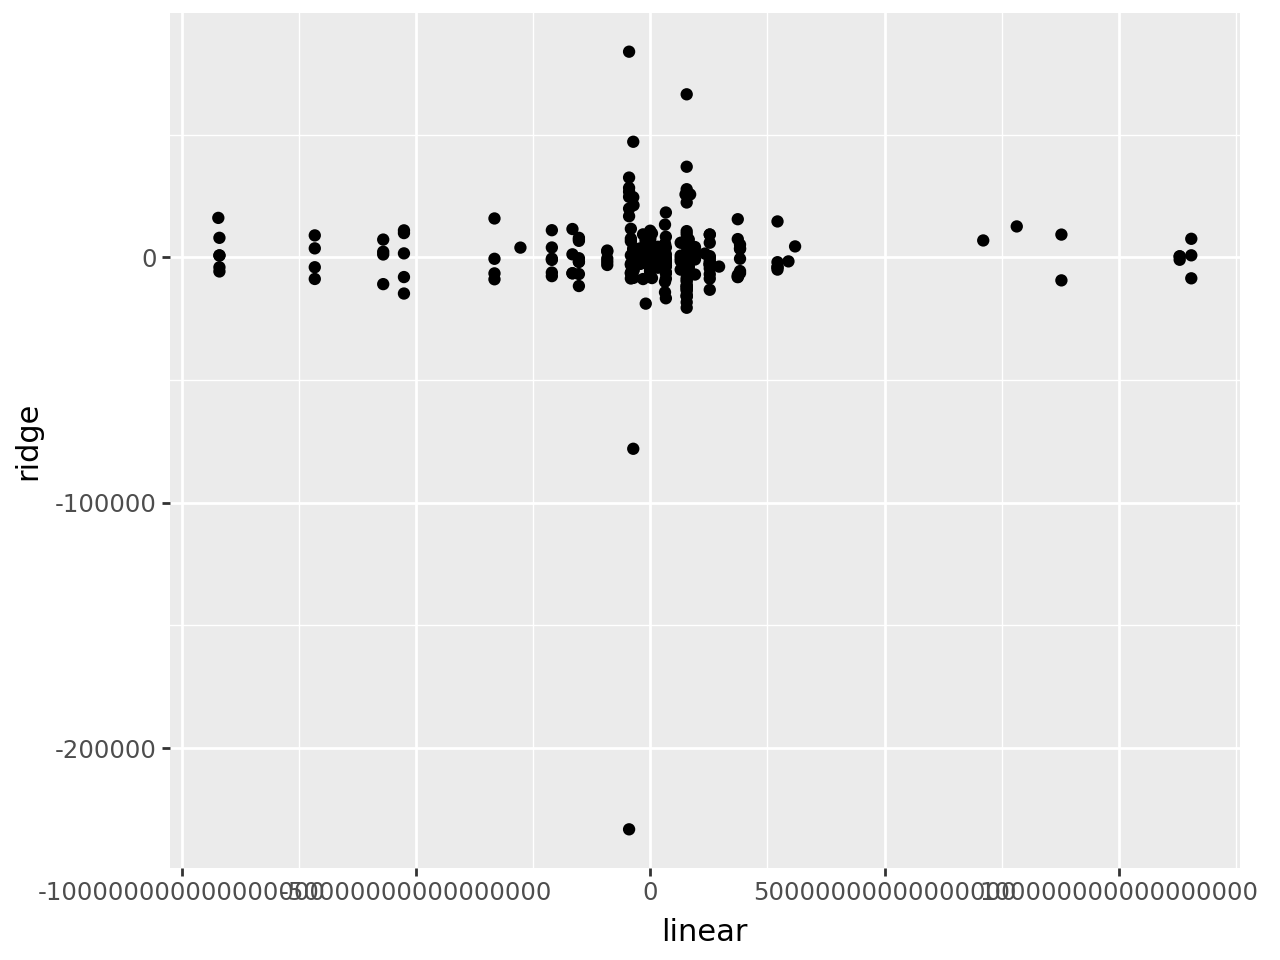

In [53]:

df_coeff = pd.DataFrame({"linear": coeff_1,
                         "ridge": coeff_2})
df_coeff['y_axis'] = 0
df_coeff

from plotnine import *
(ggplot(df_coeff, aes(x = "linear", y = "ridge"))
 + geom_point())

from plotnine import *
(ggplot(df_coeff, aes(x = "linear", y = "ridge"))
+ geom_point())

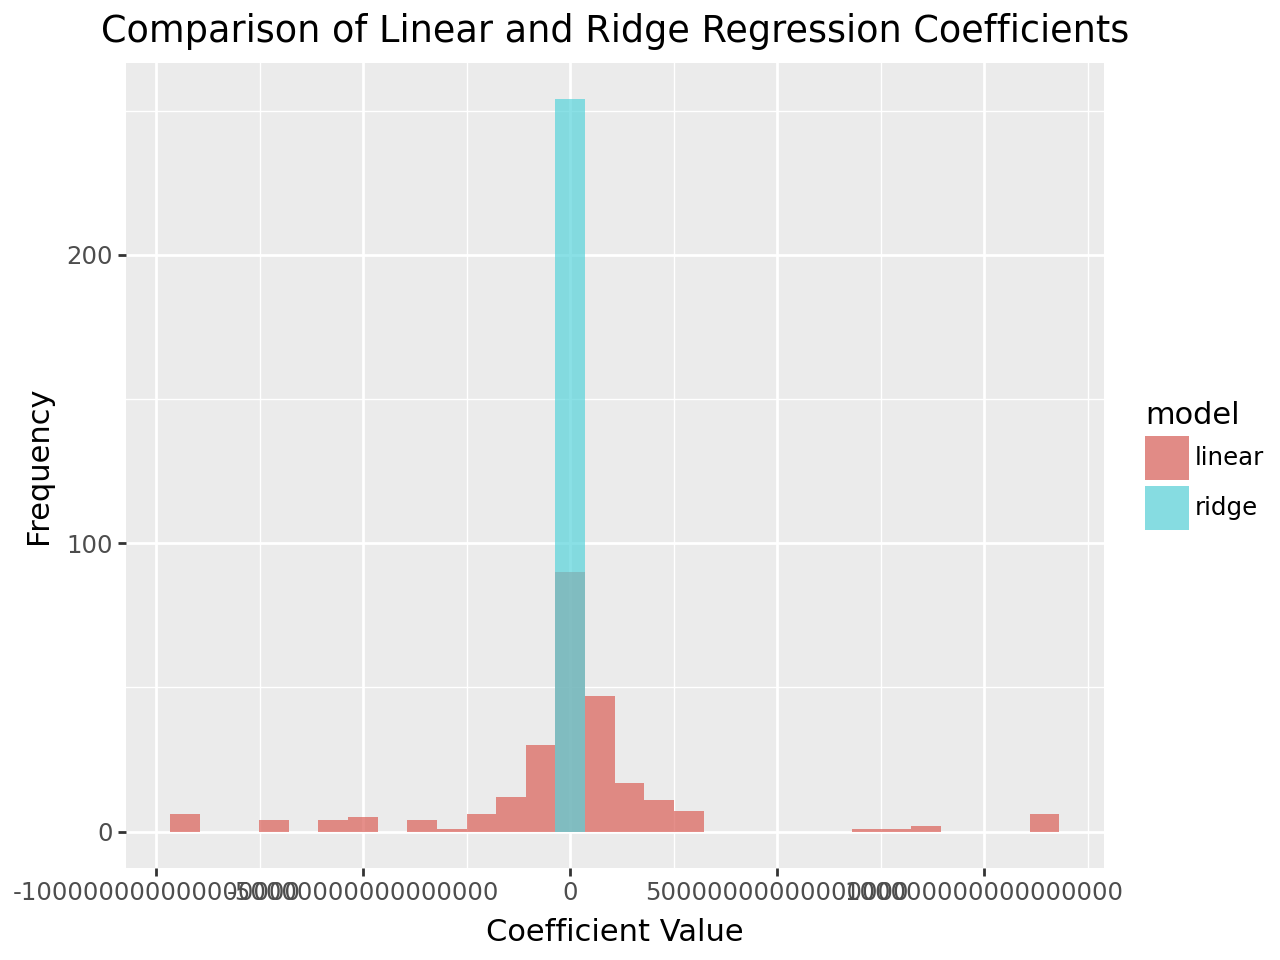

In [57]:
df_coeff = pd.DataFrame({"linear": coeff_1,
                         "ridge": coeff_2})

df_long = pd.melt(df_coeff, var_name='model', value_name='coefficient')

(ggplot(df_long, aes(x='coefficient', fill='model'))
 + geom_histogram(bins=30, alpha=0.7, position='identity')
 + labs(title='Comparison of Linear and Ridge Regression Coefficients',
        x='Coefficient Value', y='Frequency')
)

The difference in coefficient values between ordinary linear regression and ridge regression reflects the regularization effect of ridge regression. Ridge tends to reduce the magnitude of coefficients, especially when dealing with multicollinearity, to prevent overfitting. The smaller magnitude of coefficients in ridge regression is due to the regularization penalty on large values, which helps control overfitting, reduces model variance, and handles multicollinearity effectively. This makes ridge regression especially useful in datasets where features are correlated or when the dataset is small relative to the number of features.



## 14.2.1 Tuning

### Practice Activity

Using the same pipeline as previously, perform tuning on λ.

You should always try λ values on a log scale; that is, don’t use `[1,2,3,4]`; instead use something like `[0.001, 0.01, 0.1, 1, 10]`

In [77]:
list_alpha = [0.001, 0.01, 0.1, 1, 10]
alphas = {'ridge_regression__alpha': list_alpha}

from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(lr_pipeline_2, alphas, cv = 5, scoring='r2')

In [78]:
gscv_df_fit = gscv.fit(X, y)

pd.DataFrame(gscv_df_fit.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge_regression__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.232696,0.093553,0.074226,0.023300,0.001,{'ridge_regression__alpha': 0.001},0.897285,0.910406,0.789016,0.772132,0.900762,0.853920,0.060278,5
1,0.160851,0.052923,0.045299,0.019510,0.010,{'ridge_regression__alpha': 0.01},0.897343,0.910614,0.789126,0.772532,0.901317,0.854186,0.060280,4
2,0.179717,0.043361,0.040749,0.009267,0.100,{'ridge_regression__alpha': 0.1},0.897744,0.912306,0.790110,0.775764,0.905587,0.856302,0.060250,3
3,0.138451,0.047792,0.032706,0.005270,1.000,{'ridge_regression__alpha': 1},0.898158,0.917440,0.794936,0.785226,0.913898,0.861932,0.059104,2
4,0.169790,0.070567,0.036060,0.008350,10.000,{'ridge_regression__alpha': 10},0.897762,0.920812,0.800572,0.787120,0.915095,0.864272,0.058157,1


In [79]:
scores2 = gscv_df_fit.cv_results_['mean_test_score']
scores2

array([0.85392021, 0.85418638, 0.85630206, 0.86193163, 0.86427221])

In [80]:
pd.DataFrame(data = {"alpha": gscv_df_fit.cv_results_['param_ridge_regression__alpha'], "scores": gscv_df_fit.cv_results_['mean_test_score']}).sort_values(by = "scores", ascending = False)



,alpha,scores
4,10.000,0.864272
3,1.000,0.861932
2,0.100,0.856302
1,0.010,0.854186
0,0.001,0.853920


The highest r^2 of 0.864 and the alpha of 10 is the best model.

## 14.3.1 Your Turn

Create a LASSO pipeline, and tune λ.

Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS

In [110]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]

ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_3 = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso())]
)




In [111]:
scores3 = cross_val_score(lr_pipeline_3, X, y, cv=5, scoring='r2')
scores3

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.323e+10, tolerance: 1.477e+09


array([0.89774385, 0.91093785, 0.79691806, 0.77426245, 0.90589888])

In [112]:
lr_pipeline_3_fitted = lr_pipeline_3.fit(X, y)


In [113]:
coeff_3 = lr_pipeline_3_fitted.named_steps['lasso_regression'].coef_
coeff_3

array([-4.81652839e+03,  1.22724439e+03, -4.41885541e+03,  7.51982576e+03,
        3.53293929e+03, -1.15175663e+03, -2.04473222e+04,  3.44113829e-09,
       -1.41031927e+03,  4.70209827e+03,  4.83124102e+02, -1.26904092e+01,
       -9.03194952e+03,  5.48345937e+03, -1.09548228e+04,  1.19715987e+02,
        1.48059948e+04, -2.46716222e+03,  0.00000000e+00,  2.89970113e+02,
        6.47083982e+03, -6.06559741e+03, -4.80860054e+03, -0.00000000e+00,
       -0.00000000e+00,  6.66914878e+03, -1.63491350e+04,  3.88720104e+03,
        1.02876243e+04,  1.35648346e+04,  1.05643345e+03, -4.16387582e+03,
       -6.38723226e+03,  1.16048567e+04, -1.37388021e+04, -7.33924495e+03,
        1.20934300e+04,  1.32015734e+05, -5.39197495e+03,  0.00000000e+00,
        7.56702466e+03, -1.01640833e+04, -1.01751839e+04,  1.84286710e+04,
       -1.33019305e+04,  3.10914289e+04,  2.52024813e+04, -9.36511398e+03,
       -7.37390650e+03, -5.84233241e+03, -7.33009072e+03,  1.60093014e+04,
        4.27819615e+04, -

In [114]:
lambdas = {"lasso_regression__alpha": [0.001, 0.01, 0.1, 1, 10]}
gscv3 = GridSearchCV(lr_pipeline_3, lambdas, cv = 5, scoring='r2')


In [115]:
gscv_fitted3 = gscv3.fit(X, y)

gscv_fitted3.cv_results_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+11, tolerance: 1.348e+09
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+11, tolerance: 1.463e+09
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.p

{'mean_fit_time': array([1.61950164, 0.94565721, 0.84589667, 1.37863069, 0.3033288 ]),
 'std_fit_time': array([0.76586805, 0.0220264 , 0.12841544, 1.27550767, 0.08539353]),
 'mean_score_time': array([0.0337625 , 0.03006511, 0.02829661, 0.03432126, 0.02934203]),
 'std_score_time': array([0.01151217, 0.00098273, 0.00252517, 0.01070152, 0.0021868 ]),
 'param_lasso_regression__alpha': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0],
              mask=[False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'lasso_regression__alpha': 0.001},
  {'lasso_regression__alpha': 0.01},
  {'lasso_regression__alpha': 0.1},
  {'lasso_regression__alpha': 1},
  {'lasso_regression__alpha': 10}],
 'split0_test_score': array([0.8972019 , 0.89720561, 0.89725821, 0.89774385, 0.90077569]),
 'split1_test_score': array([0.9103958 , 0.91040134, 0.91045103, 0.91093785, 0.91506699]),
 'split2_test_score': array([0.79032004, 0.79085941, 0.79595065, 0.79691806, 0.80141962]),
 'split3_test_score'

In [116]:
results_df = pd.DataFrame({
    "Lambda": lambdas["lasso_regression__alpha"],
    "scores_ridge": gscv_df_fit.cv_results_['mean_test_score'],
    "scores_lasso": gscv_fitted3.cv_results_['mean_test_score']
})

results_df.sort_values(by = "scores_lasso", ascending = False).head()


,Lambda,scores_ridge,scores_lasso
4,10.000,0.864272,0.860632
3,1.000,0.861932,0.857152
2,0.100,0.856302,0.856618
1,0.010,0.854186,0.855606
0,0.001,0.853920,0.855499


The highest r^2 of 0.860 and the alpha of 10 is the best model.

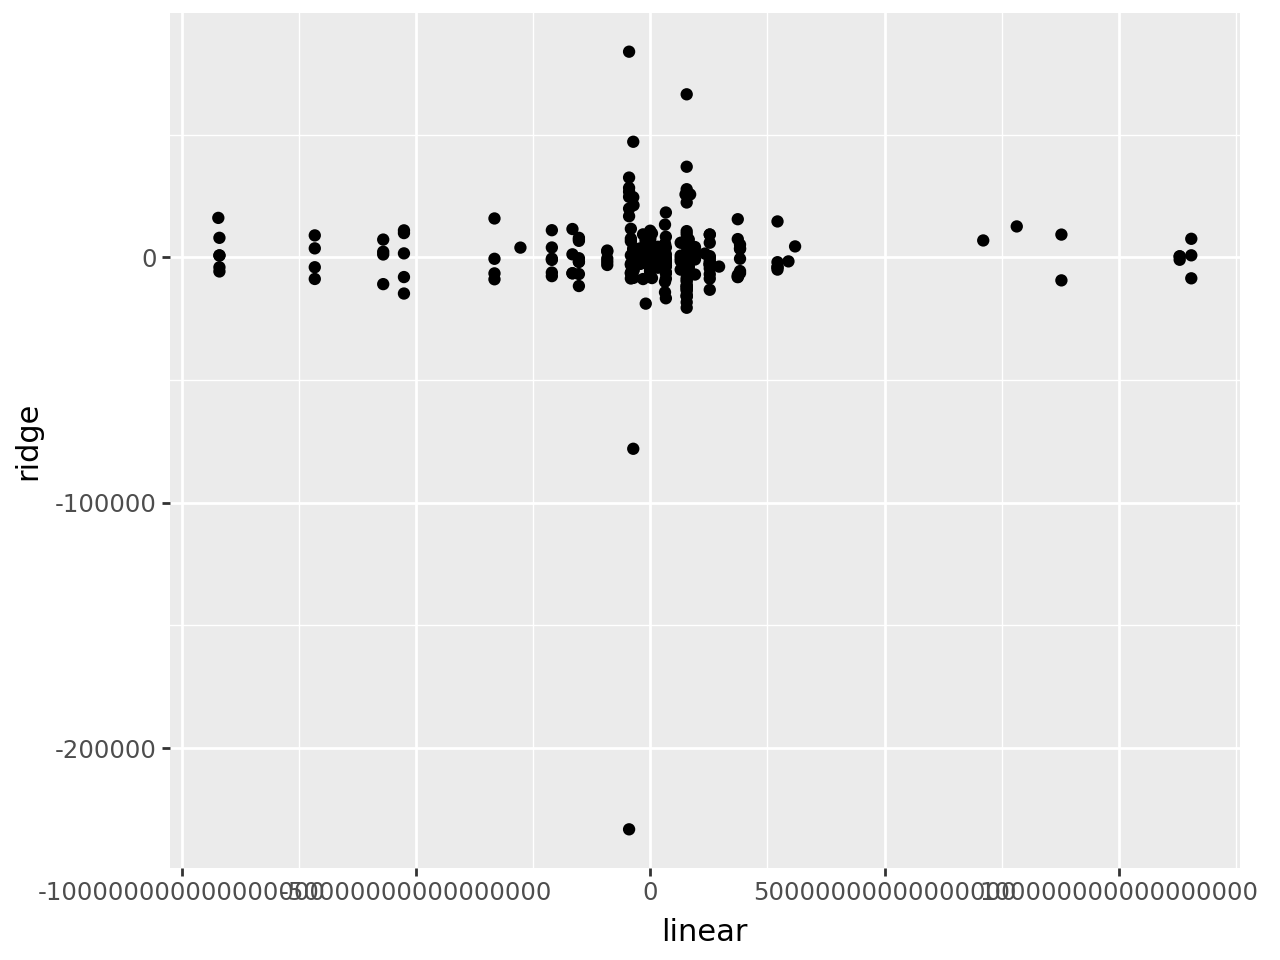

In [117]:
df_coeff["lasso"] = coeff_3
df_coeff

(ggplot(df_coeff, aes(x = "linear", y = "ridge")) + geom_point())

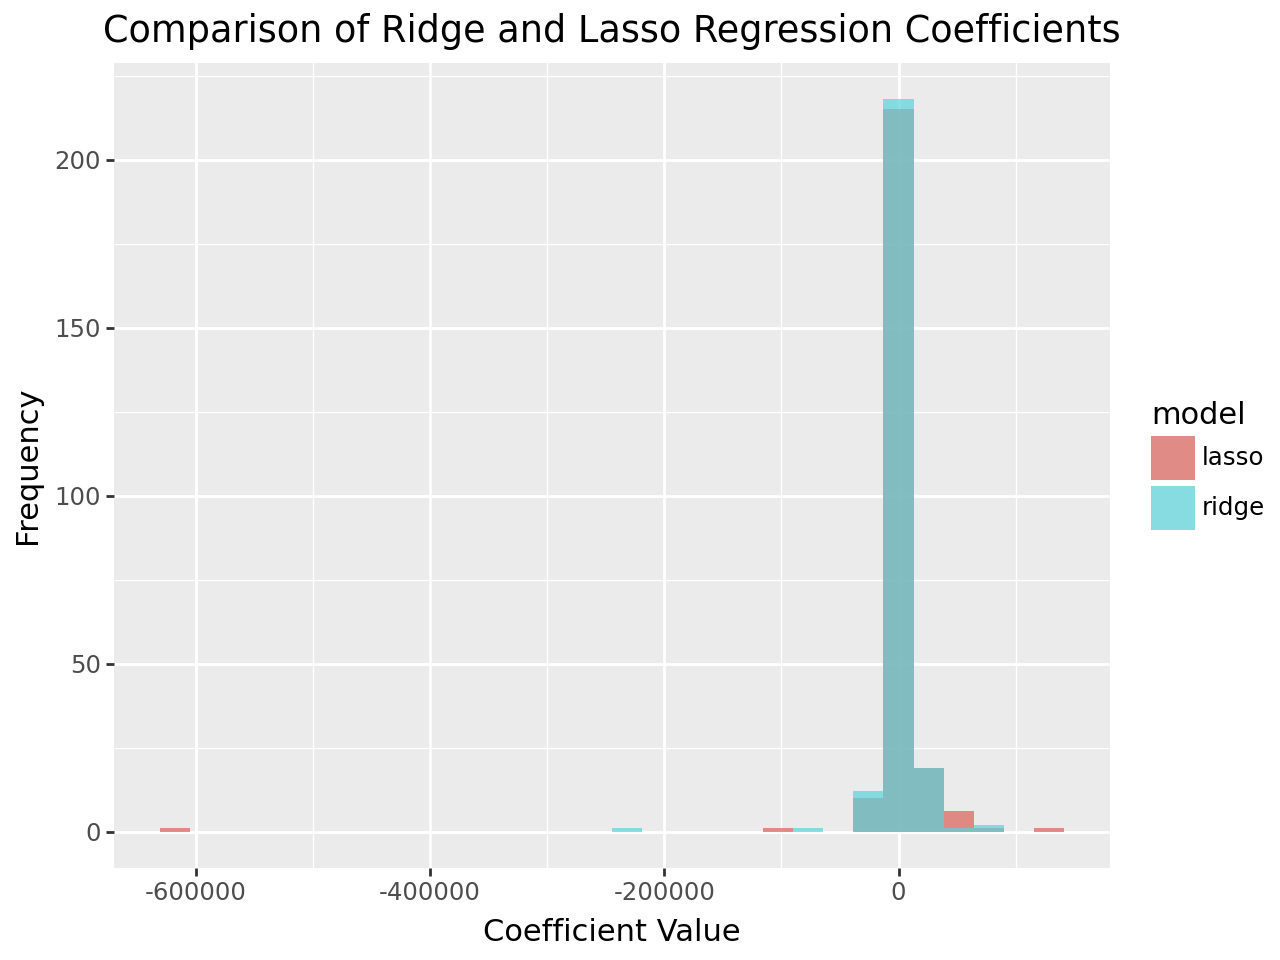

In [125]:

df_coeff = pd.DataFrame({
                         "ridge": coeff_2,
                         "lasso": coeff_3})

df_long = pd.melt(df_coeff, var_name='model', value_name='coefficient')

(ggplot(df_long, aes(x='coefficient', fill='model'))
 + geom_histogram(bins=30, alpha=0.7, position='identity')
 + labs(title='Comparison of Ridge and Lasso Regression Coefficients',
        x='Coefficient Value', y='Frequency')
)

In [127]:
feature_names = lr_pipeline_3.named_steps['preprocessing'].get_feature_names_out()
coeff_3 = lr_pipeline_3_fitted.named_steps['lasso_regression'].coef_
coefficients_df2 = pd.DataFrame({
    'Feature': feature_names,
    'Lasso Coefficients': coeff_3
})

coefficients_df2.sort_values(by='Lasso Coefficients', ascending=False).reset_index(drop=True).head()

,Feature,Lasso Coefficients
0,dummify__Neighborhood_GrnHill,132015.733845
1,dummify__Exterior 1st_PreCast,76167.305679
2,dummify__Condition 2_RRAe,60878.855589
3,dummify__Roof Matl_WdShngl,58830.723632
4,dummify__Condition 2_PosA,56839.482273


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 229 rows containing missing values.


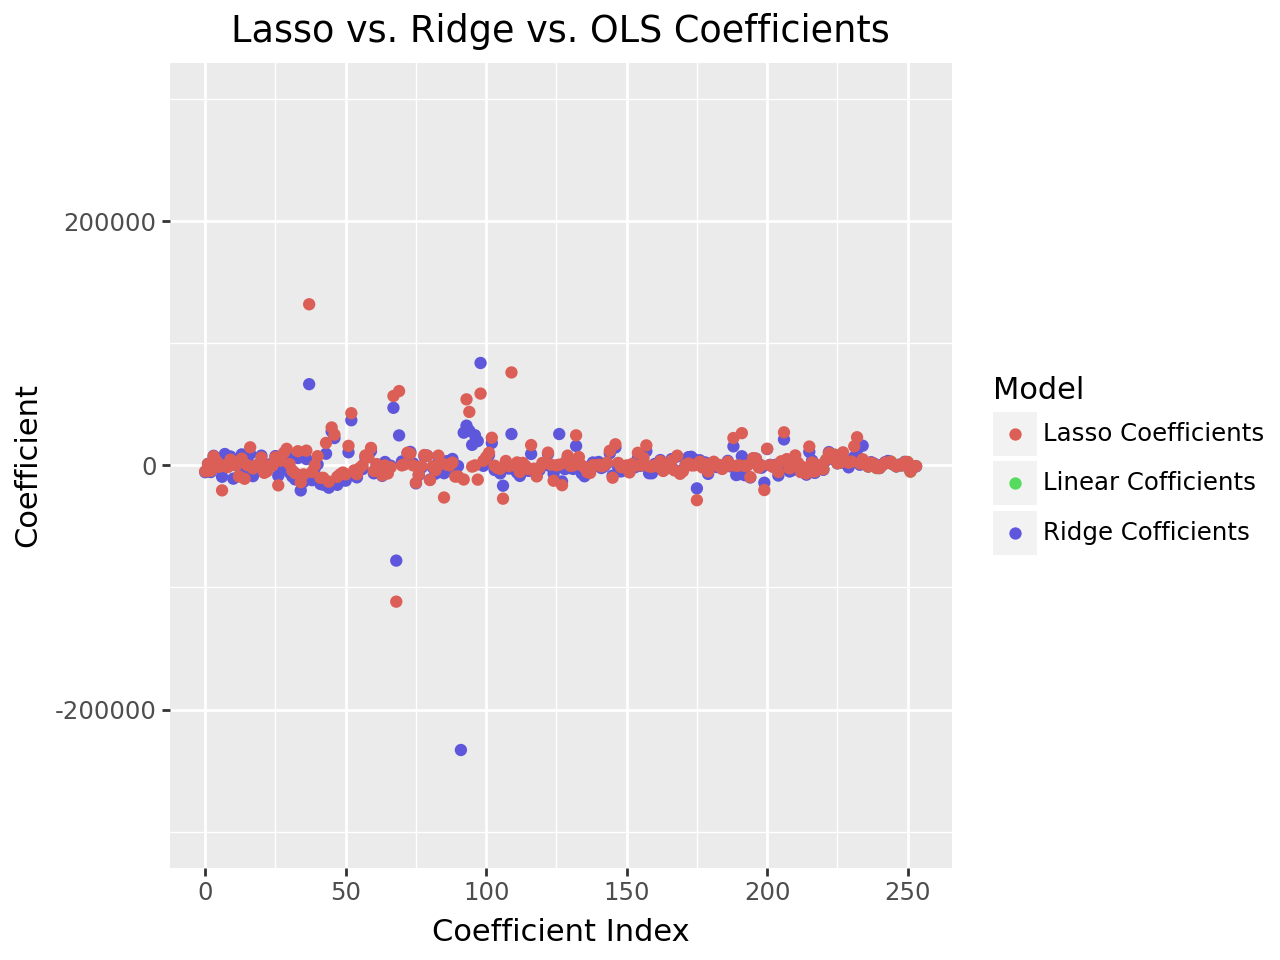

In [132]:


coefficients_df3 = pd.DataFrame({'Feature': feature_names,
                                 'Linear Cofficients': coeff_1,
                                 'Ridge Cofficients': coeff_2,
                                 'Lasso Coefficients': coeff_3})
plot_df = coefficients_df3[['Feature']].copy()
plot_df2 = pd.merge(plot_df, coefficients_df3, left_on = "Feature", right_on = "Feature")
plot_df2 =  plot_df2.reset_index()
plot_df2 = pd.melt(plot_df2, id_vars = ["index", "Feature"], value_vars= ["Linear Cofficients", "Ridge Cofficients", "Lasso Coefficients"], var_name = "Model", value_name = "Coefficient")
from plotnine import scale_y_continuous
(ggplot(plot_df2, aes(x = "index", y = "Coefficient", color = "Model"))+
    geom_point()+
    labs(title = "Lasso vs. Ridge vs. OLS Coefficients",
         x = "Coefficient Index",
         y = "Coefficient")+
    scale_y_continuous(limits = (-300000, 300000)))

The plot compares the coefficients for Lasso, Ridge, and Linear Regression (OLS) on the Ames dataset. Generally, the Lasso regression coefficients show more sparsity, with some coefficients being exactly zero, indicating that Lasso performs feature selection by reducing unimportant coefficients to zero. Ridge regression shrinks the coefficients more evenly, keeping them close to zero without fully eliminating any. Interestingly, the Ordinary Least Squares (OLS) coefficients are also closer to zero than expected, which could indicate less multicollinearity or feature importance distribution across the dataset. Overall, both Lasso and Ridge provide regularized solutions, with Lasso favoring sparsity and Ridge minimizing large coefficient swings for a more stable model.

## 14.3.4 Your Turn

Create an Elastic Net pipeline, and tune λ and α.

Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS.

In [137]:

X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]

ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_4 = Pipeline(
  [("preprocessing", ct),
  ("elastic_regression", ElasticNet())]
)



In [138]:
scores = cross_val_score(lr_pipeline_4, X, y, cv=5, scoring='r2')
scores

array([0.84843362, 0.89484602, 0.78295991, 0.74618167, 0.88108029])

In [139]:
lr_pipeline_4_fitted = lr_pipeline_4.fit(X, y)


In [141]:
coeff_4 = lr_pipeline_4_fitted.named_steps['elastic_regression'].coef_
coeff_4

array([-1.41971922e+02,  3.49433582e+02, -2.03580414e+01, -5.50851860e+01,
        1.19278794e+03, -1.32280672e+03, -1.62088197e+02,  1.62088197e+02,
        1.20556585e+03,  4.53852497e+02, -3.23910163e+02, -1.33550888e+03,
       -1.01959675e+03,  1.78364939e+03,  3.73732791e+01, -8.01425975e+02,
        6.48076760e+01, -3.10352740e+01, -3.27724020e+01, -4.64171474e+02,
        1.06965273e+03, -3.89430628e+02, -4.94795451e+01, -1.63571034e+02,
       -7.68560979e+02,  8.11751119e+02, -4.21901543e+01, -2.80646693e+02,
       -1.70414981e+01, -2.17215254e+02,  2.65237116e+02,  2.72005729e+01,
       -1.07250023e+03,  1.18511274e+03, -1.16462268e+03, -9.82172859e+02,
        2.14559216e+01,  8.67592166e+01, -2.20022688e+02, -9.47995459e+00,
       -7.26218253e+01, -4.68320312e+02, -1.08213199e+03, -2.92015469e+01,
       -1.03046500e+03,  1.58235398e+03,  3.10851930e+03, -7.59182036e+02,
       -1.49004190e+02, -2.52738636e+02, -6.97839903e+02,  5.19177028e+02,
        1.64043545e+03, -

In [144]:
lambdas = {"elastic_regression__alpha": [0.001, 0.01, 0.1, 1, 10],
           "elastic_regression__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]}


gscv = GridSearchCV(lr_pipeline_4, lambdas, cv = 5, scoring= "r2")

gscv_fitted = gscv.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.466e+11, tolerance: 1.348e+09
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.259e+11, tolerance: 1.474e+09
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.122e+11, tolerance: 1.463e+09
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.p

In [145]:
feature_names = lr_pipeline_4.named_steps['preprocessing'].get_feature_names_out()
coeff_4 = lr_pipeline_4_fitted.named_steps['elastic_regression'].coef_
coefficients_df3 = pd.DataFrame({
    'Feature': feature_names,
    'Elastic Coefficients': coeff_4
})

coefficients_df3.sort_values(by='Elastic Coefficients', ascending=False).reset_index(drop=True).head()

,Feature,Elastic Coefficients
0,standardize__Overall Qual,12420.019080
1,standardize__Gr Liv Area,9038.823486
2,standardize__1st Flr SF,6513.327904
3,standardize__Total Bsmt SF,6160.794161
4,standardize__Mas Vnr Area,5501.417355


In [157]:
cv_results = gscv_fitted.cv_results_

results_df = pd.DataFrame(cv_results)
results_df = results_df[["param_elastic_regression__alpha", "param_elastic_regression__l1_ratio", "mean_test_score"]]
results_df = results_df.sort_values(by="mean_test_score", ascending=False).reset_index(drop = True)

results_df.head()

,param_elastic_regression__alpha,param_elastic_regression__l1_ratio,mean_test_score
0,0.01,0.5,0.864268
1,0.01,0.7,0.864157
2,0.01,0.3,0.864119
3,0.01,0.1,0.863848
4,0.10,0.9,0.863687


In [159]:
results_df.rename(columns={"param_elastic_regression__alpha": "lambda",
                   "param_elastic_regression__l1_ratio": "alpha",
                   "mean_test_score": "r2"}, inplace = True)

results_df.sort_values(by = "r2", ascending = False).head()
results_df

,lambda,alpha,r2
0,0.010,0.5,0.864268
1,0.010,0.7,0.864157
2,0.010,0.3,0.864119
3,0.010,0.1,0.863848
4,0.100,0.9,0.863687
5,0.010,0.9,0.863194
6,0.001,0.1,0.863061
7,0.001,0.3,0.862712
8,0.001,0.5,0.862155
9,0.001,0.7,0.861085


The highest r^2 of 0.8643 and the lambda value of 0.010 and alpha of 0.5 is the best model.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 229 rows containing missing values.


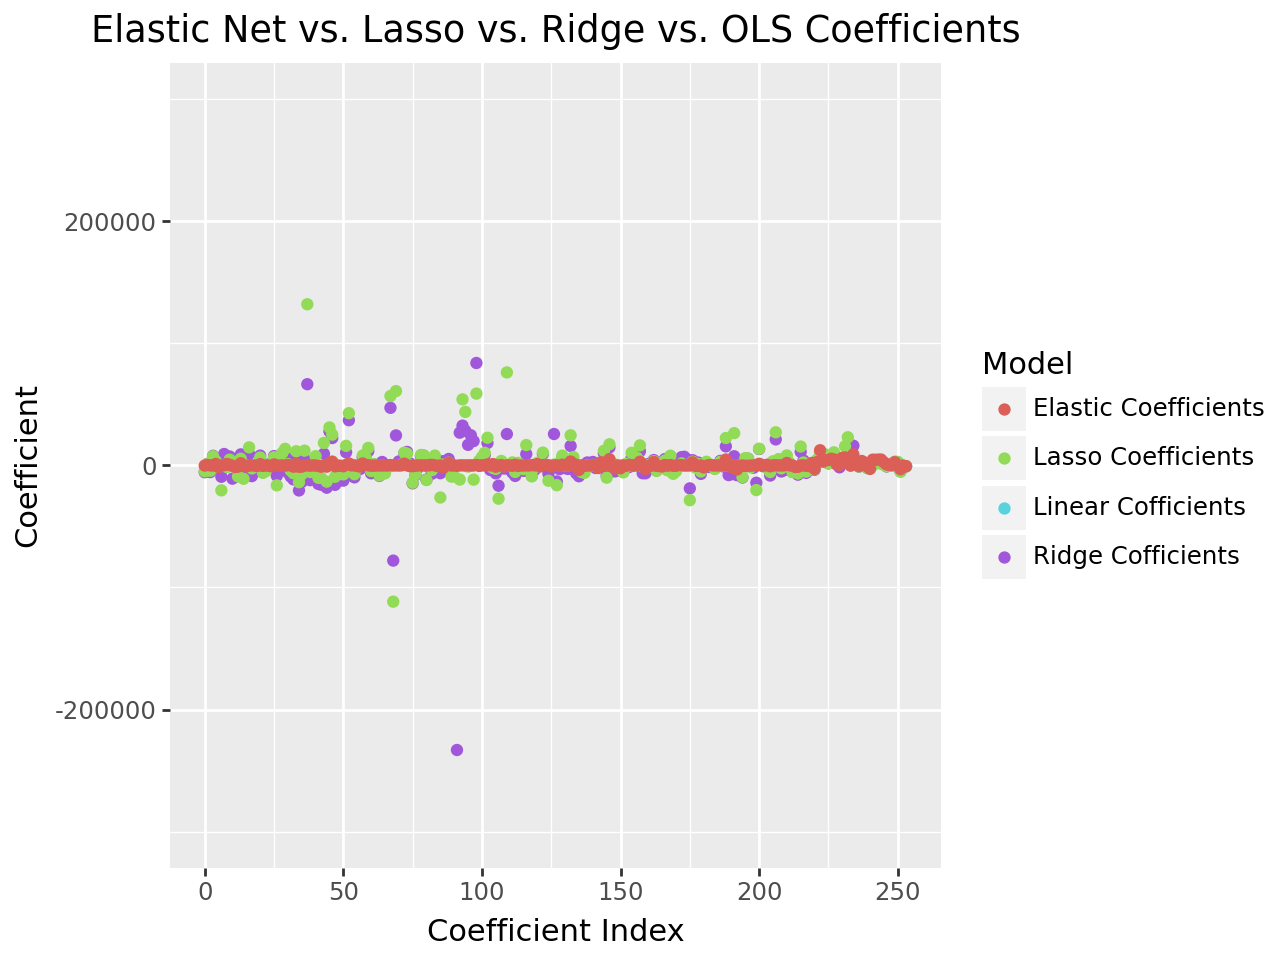

In [168]:

coefficients_df4 = pd.DataFrame({'Feature': feature_names,
                                 'Linear Cofficients': coeff_1,
                                 'Ridge Cofficients': coeff_2,
                                 'Lasso Coefficients': coeff_3,
                                 'Elastic Coefficients': coeff_4})
plot_df = coefficients_df4[['Feature']].copy()
plot_df2 = pd.merge(plot_df, coefficients_df4, left_on = "Feature", right_on = "Feature")
plot_df2 =  plot_df2.reset_index()
plot_df2 = pd.melt(plot_df2, id_vars = ["index", "Feature"], value_vars= ["Linear Cofficients", "Ridge Cofficients", "Lasso Coefficients", "Elastic Coefficients"], var_name = "Model", value_name = "Coefficient")
(ggplot(plot_df2, aes(x = "index", y = "Coefficient", color = "Model"))+
    geom_point()+
    labs(title = "Elastic Net vs. Lasso vs. Ridge vs. OLS Coefficients",
         x = "Coefficient Index",
         y = "Coefficient")+
    scale_y_continuous(limits = (-300000, 300000)))